# Student Mental Health Notebook

by Cindy Jaimes

Consultant: Kyle Krantz (senior)


In [1]:
import numpy as np

number_of_students = 530
number_of_weeks_in_semester = 27 # 15 for the semester + 12 for the summer


## In this cell, let's model the external stress on the student body.

## The two biggest events during the semester are midterms and spring break, finals and then SUMMER VACATION!

Link to: [Semester Schedule](http://physics.stmarys-ca.edu/shared/resources/Calendar-20S.pdf)

Major events:

* Week 8: Midterms
* Week 9: Spring Break
* Week 15: Finals
* Week 15-27: Summer Vacation

Scale from 0 - 100  for stress levels 

In [2]:
medium_stress = 40
zero_stress = 0
typical_stress = 15
mondo_stress = 80
def stress_level(week_number):
    if week_number == 7:
        return medium_stress
    elif week_number == 9 or week_number > 15:  # spring and summer vacation
        return zero_stress
    elif week_number == 15:
        return mondo_stress
    else:
        return typical_stress

## Mental states reguarding: 
## * Moods 
## * Resiliencies 
## * Roommate Effect






Scale of 0 - 10







In [3]:
initial_mental_states = np.zeros((number_of_students,))

# The simplest initial conditions we could come up with. Another thing to make more realistic.
initial_mental_states.fill(7) # start them all with a nice medium 7

student_mental_states = np.zeros((number_of_weeks_in_semester + 1, number_of_students))

# mental state goes from 0 to 10 -- where 0 is paralyzed by depression and 10 is fully productive and happy

student_mental_states[0, :] = initial_mental_states

np.random.seed(40)
student_resiliencies = np.random.rand(number_of_students)

In [4]:
for i in range(1, number_of_weeks_in_semester + 1):
    for j in range(0, number_of_students):
        # The simplest, most unrealistic, and totally depressing function we could come up with
        # just to get started having a model. Now the job is to make it more realistic.
        stress = stress_level(i)
        stress_effect = student_mental_states[i - 1, j] * (1 - 0.8 * stress / 100)
        
        # if even j, your roommate is j + 1.
        # if odd j, your rommate is j - 1
        my_prior_mental_state = student_mental_states[i - 1, j]
        if j % 2 == 0:
            roommate_j = j + 1
        else:
            roommate_j = j - 1
        # Now that we know j for the roommmate, get the roommate's prior mental state
        roommate_prior_mental_state = student_mental_states[i - 1, roommate_j]
        
        resiliency_effect = (7.0 - student_mental_states[i - 1, j]) * student_resiliencies[j]
        
        roommate_effect = 0.4 * (roommate_prior_mental_state - my_prior_mental_state)
        student_mental_states[i, j] = stress_effect + resiliency_effect + roommate_effect



## Roommate Effect Graph

## * pair of roommates 

This will show student 0, 1, 10, and 11 and how they are affected within each other


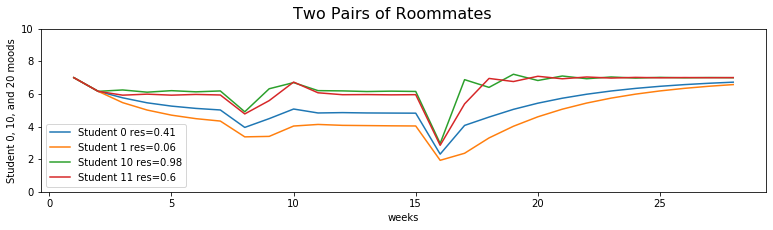

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

student0_mental_state = student_mental_states[:, 0]
student1_mental_state = student_mental_states[:, 1]


student10_mental_state = student_mental_states[:, 10]
student11_mental_state = student_mental_states[:, 11]


fig = plt.figure(figsize=(13, 3))

plt.plot(range(1, number_of_weeks_in_semester + 2), student0_mental_state)
plt.plot(range(1, number_of_weeks_in_semester + 2), student1_mental_state)


plt.plot(range(1, number_of_weeks_in_semester + 2), student10_mental_state)
plt.plot(range(1, number_of_weeks_in_semester + 2), student11_mental_state)


plt.xlabel("weeks")
plt.ylabel("Student 0, 10, and 20 moods")
plt.legend(("Student 0 res=" + str(round(student_resiliencies[0], 2)), \
            "Student 1 res=" + str(round(student_resiliencies[1], 2)), \
            "Student 10 res=" + str(round(student_resiliencies[10], 2)), \
            "Student 11 res=" + str(round(student_resiliencies[11], 2))))
plt.ylim(0, 10)

fig.suptitle("Two Pairs of Roommates", fontsize=16)

plt.show()


## Sampling of 10 students 

This will show 10 different students and their stress and mood levels within the course of a semester including Summer Vacation 

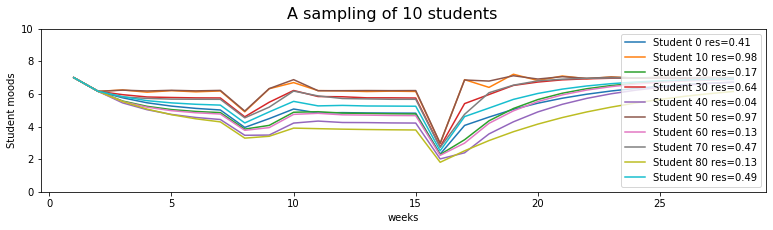

In [9]:
student_ids = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

mental_states_for_ids = []
legend = []


for student_id in student_ids:
    mental_states_for_ids.append(student_mental_states[:, student_id])
    legend_text = "Student " + str(student_id) + " res=" + str(round(student_resiliencies[student_id], 2))
    legend.append(legend_text)

    
fig = plt.figure(figsize=(13, 3))

for mental_states in mental_states_for_ids:
     plt.plot(range(1, number_of_weeks_in_semester + 2), mental_states)
        

plt.xlabel("weeks")
plt.ylabel("Student moods")
plt.legend(legend)

plt.ylim(0, 10)

fig.suptitle("A sampling of " + str(len(student_ids)) + " students", fontsize=16)


plt.show()


## In conclusion 

Each graph is different and within the course of a semester and summer vacation everyone goes through those 27 weeks different than others and the graph reguarding roommates can also impact your stress and moods. Everyone may look similar but this graph also does not include technicalities such as things that impact your life like family problems, sickness, relationship issues, etc...